#  Working with Unlabeled Data – Clustering Analysis
In the previous lectures, you have discovered supervised learning techniques to build machine learning models using data where the answer was already known : the class labels were already available in our training data. 

In this lecture, we will explore cluster analysis, a category of unsupervised learning techniques that allows us to discover hidden structures in data where we do not know the right answer upfront. 

The goal of clustering is to find a natural grouping in data such that items in the same cluster are more similar to each other than those from different clusters.

Given its exploratory nature, clustering is an exciting topic. 

You will learn about the following concepts that can help you to organize data into meaningful structures: You will be introduced to 3 types of clustering techniques:
- Prototype-based clustering
 - Finding centers of similarity using the popular k-means algorithm
- Hierarchical clustering 
 - Using a bottom-up approach to build hierarchical cluster trees
- Density-based clustering
 - Identifying arbitrary shapes of objects using a density-based clustering approach



# Prototype-based clustering
A prototype-based clustering means that each cluster is represented by a prototype. A prototype can be:
- the centroid (average) of similar points with continuous features
- the medoid (the most representative or most frequently occurring point) in the case of categorical features.


The k-means algorithm belongs to the category of prototype-based clustering.

## Grouping objects by similarity using k-means
 k-means algorithm is extremely easy to implement but is also computationally very efficient compared to other clustering algorithms, which might explain its popularity.
 
### Algorithm
Our goal is to group the samples based on their feature similarities. k-means algorithm can be summarized by the following four steps:
1. Randomly pick k centroids from the sample points as initial cluster centers.
2. Assign each sample to the nearest centroid $\mu(j), j∈{1,...,k}$.
3. Move the centroids to the center of the samples that were assigned to it.
4. Repeat steps 2 and 3 until the cluster assignments do not change or a user-defined tolerance or a maximum number of iterations is reached.

### How to measure similarity between samples?
Similarity can be defined as the opposite of distance. The lower the distance between two points, the more similar they are.
Commonly used distance for clustering samples with continuous features is the squared Euclidean distance between two points x and y in m-dimensional space:

$
d(x,y)^{2} =  \sum\limits_{j=1}^{m}{\left( x^{(j)} - y^{(j)} \right)}^{2} = \left\lVert x-y\right\rVert_{2}^{2}
$


$m$ is the number of features (attributes). $j$ referes to the $j^{th}$ feature column.

Based on this Euclidean distance metric, we can describe the k-means algorithm
as a simple optimization problem, an iterative approach for minimizing the within-cluster sum of squared errors (SSE), which is sometimes also called cluster inertia:

$
SSE =  \sum\limits_{i=1}^{n}{
\sum\limits_{j=1}^{k}{
w^{(i,j)}
\left\lVert (x^{(i)} - \mu^{(j)}) \right\rVert_{2}^{2} }
}
$  

- $\mu( j )$ is the representative point (centroid) for cluster $j$ 
- $w^{(i,j)}$ = 1 if the sample $x(i)$ is in cluster $j$; $w^{(i,j)} = 0$ otherwise.


Lets implement k-means algorithm.

### Dataset generation
We will first generate a dataset that will serve our playground for k-means. 
To do this we use scikit-learn <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html">make_blobs</a>.

- n_samples : int or array-like, optional (default=100) - 
If int, it is the total number of points equally divided among clusters. If array-like, each element of the sequence indicates the number of samples per cluster.
- n_features : int, optional (default=2) - 
The number of features for each sample.
- centers : int or array of shape [n_centers, n_features], optional (default=None) - The number of centers to generate, or the fixed center locations. If n_samples is an int and centers is None, 3 centers are generated. If n_samples is array-like, centers must be either None or an array of length equal to the length of n_samples.
- cluster_std : float or sequence of floats, optional (default=1.0) - 
The standard deviation of the clusters.
- center_box : pair of floats (min, max), optional (default=(-10.0, 10.0)) - 
The bounding box for each cluster center when centers are generated at random.
- shuffle : boolean, optional (default=True) - 
Shuffle the samples.
- random_state : int, RandomState instance or None (default) - 
Determines random number generation for dataset creation. Pass an int for reproducible output across multiple function calls. See Glossary.

#### Import the necessary libraries
Import numpy, pandas, matplotlib, scipy, and sklearn.

In [64]:
import numpy as np
import pandas as pd
import matplotlib
import scipy
import sklearn

#### Create a dataset consisting of 150 randomly generated points that are roughly grouped into three regions.
Use make_blobs. Set the following parameters:

- n_samples=150, 
- n_features=2, 
- centers=3, 
- cluster_std=0.5, 
- shuffle=True, 
- random_state=0

Put the dataset in the variables named X and y. X will contain the features, and y will contain the labels.

In [65]:
# raise NotImplementedError()

In [66]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150, n_features=2, centers = 3, cluster_std = 0.5, shuffle=True, random_state=0)

#### Visualize the data via a two-dimensional scatterplot
- Use the function `scatter` from `matplotlib.pyplot`. <a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html">Here is the documentation.</a>

- Plot X[:,0] in function of X[:,1]

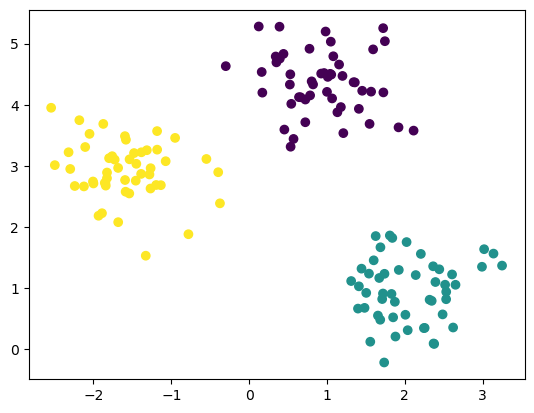

In [67]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c = y)

### Fit kmeans to the data using the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html">Kmeans</a> class of scikit learn

- import KMeans from sklearn.cluster  
- `km= Kmeans(parametes)`

Set the following parameters.

- `n_clusters=3` set the number of desired clusters to 3
- `init` : init : {‘k-means++’, ‘random’ or an ndarray} - Method for initialization, defaults to ‘k-means++’:
  - `‘k-means++’` : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. 
  - `‘random’`: choose k observations (rows) at random from data for the initial centroids.
  - If an ndarray is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.

- set `n_init=10` to run the k-means clustering algorithms 10 times independently with different random centroids to choose the final model as the one with the lowest SSE. 
- `max_iter`:  specify the maximum number of iterations for each single run (here, 300). Note that the k-means implementation in scikit-learn stops early if it converges before the maximum number of iterations is reached.
- `random_state =0`

However, it is possible that k-means does not reach convergence for a particular run, which can be problematic (computationally expensive) if we choose relatively large values for max_iter. One way to deal with convergence problems is to choose larger values for 
- `tol` which is a parameter that controls the tolerance with regard to the changes in the within-cluster sum-squared-error to declare convergence. 
- chose a tolerance of 1e-04 (=0.0001).

In [68]:
from sklearn.cluster import KMeans 
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0, tol=0.0001)

#### Checkout the predicted clusters:
Use `km.fit_predict(features)`. Reminders you have put your features in variable `X`.

In [69]:
km.fit_predict(X)

array([1, 2, 2, 2, 1, 2, 2, 1, 0, 2, 1, 0, 0, 2, 2, 0, 0, 1, 0, 1, 2, 1,
       2, 2, 0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 0, 2, 1,
       1, 1, 0, 2, 0, 2, 1, 2, 2, 1, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 2, 0,
       2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1, 1, 1, 0,
       0, 1, 1, 2, 1, 2, 1, 2, 0, 0, 1, 1, 1, 1, 0, 1, 1, 2, 0, 2, 2, 2,
       0, 2, 1, 0, 2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 2, 0, 1, 0, 2, 2, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int32)

#### What are the Predicted clusters' centers (centroids)?

In [70]:
km.cluster_centers_

array([[-1.5947298 ,  2.92236966],
       [ 2.06521743,  0.96137409],
       [ 0.9329651 ,  4.35420712]])

#### Get the labels found of the K-means

In [71]:
km.labels_

array([1, 2, 2, 2, 1, 2, 2, 1, 0, 2, 1, 0, 0, 2, 2, 0, 0, 1, 0, 1, 2, 1,
       2, 2, 0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 0, 2, 1,
       1, 1, 0, 2, 0, 2, 1, 2, 2, 1, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 2, 0,
       2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1, 1, 1, 0,
       0, 1, 1, 2, 1, 2, 1, 2, 0, 0, 1, 1, 1, 1, 0, 1, 1, 2, 0, 2, 2, 2,
       0, 2, 1, 0, 2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 2, 0, 1, 0, 2, 2, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int32)

### Find the center of clusters (value of centroids)

In [72]:
km.cluster_centers_


array([[-1.5947298 ,  2.92236966],
       [ 2.06521743,  0.96137409],
       [ 0.9329651 ,  4.35420712]])

In [73]:
y_km = km.labels_

### Plot the results of clustering

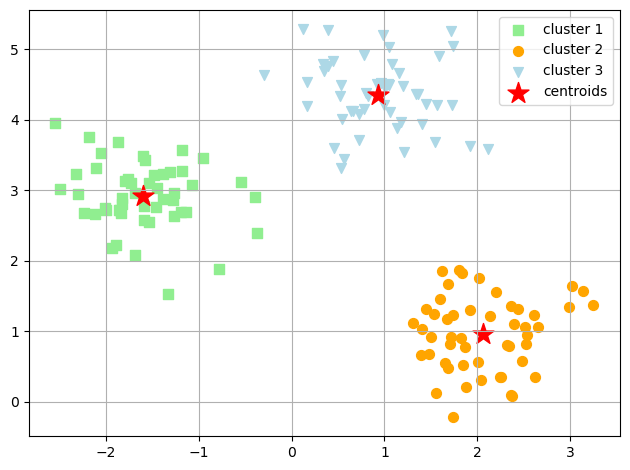

In [74]:
plt.scatter(X[y_km==0,0], 
            X[y_km==0,1], 
            s=50, 
            c='lightgreen', 
            marker='s', 
            label='cluster 1')
plt.scatter(X[y_km==1,0], 
            X[y_km==1,1], 
            s=50, 
            c='orange', 
            marker='o', 
            label='cluster 2')
plt.scatter(X[y_km==2,0], 
            X[y_km==2,1], 
            s=50, 
            c='lightblue', 
            marker='v', 
            label='cluster 3')
plt.scatter(km.cluster_centers_[:,0], 
            km.cluster_centers_[:,1], 
            s=250, 
            marker='*', 
            c='red', 
            label='centroids')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

### Predict the cluster of a new data point:
Use the `predict` function.

In [75]:
sample_test=np.array([1.0,3.0])
second_test=sample_test.reshape(1, -1)

In [76]:
km.predict(X)

array([1, 2, 2, 2, 1, 2, 2, 1, 0, 2, 1, 0, 0, 2, 2, 0, 0, 1, 0, 1, 2, 1,
       2, 2, 0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 0, 2, 1,
       1, 1, 0, 2, 0, 2, 1, 2, 2, 1, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 2, 0,
       2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1, 1, 1, 0,
       0, 1, 1, 2, 1, 2, 1, 2, 0, 0, 1, 1, 1, 1, 0, 1, 1, 2, 0, 2, 2, 2,
       0, 2, 1, 0, 2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 2, 0, 1, 0, 2, 2, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int32)

## k-means++
The classic k-means algorithm uses a random seed to place the initial centroids. So, if a centroid is initialized too far, it might end up with no points associated with it and at the same time more than one clusters might end up linked with a single centroid. Similarly, more than one centroids might be initialized into the same cluster resulting in poor clustering or slow convergence. For example, consider the images shown below.

A poor initialisation of centroids resulted in poor clustering.
![poor](img/poorClustering.png)

![ideal](img/idealClustering.png)


One way to address this is to use k-means++ which is an algorithm for choosing the initial values (or "seeds") for the k-means clustering algorithm.

This algorithm ensures a smarter initialization of the centroids and improves the quality of the clustering. Apart from initialization, the rest of the algorithm is the same as the standard K-means algorithm. That is K-means++ is the standard K-means algorithm coupled with a smarter initialization of the centroids.



**Initialization algorithm:**

The steps involved are:

- Randomly select the first centroid from the data points.
- For each data point compute its distance from the nearest, previously choosen centroid.
- Select the next centroid from the data points such that as the point having maximum distance from the nearest centroid 
- Repeat steps 2 and 3 untill k centroids have been sampled

**Intuition:**

By following the above procedure for initialization, we **pick up centroids which are far away from one another**. This increases the chances of initially picking up centroids that lie in different clusters. Also, since centroids are picked up from the data points, each centroid has some data points associated with it at the end.

**Reference**

(D. Arthur and S. Vassilvitskii. k-means++: The Advantages of Careful Seeding. In Proceedings of the eighteenth annual ACM-SIAM symposium on Discrete algorithms, pages 1027–1035. Society for Industrial and Applied Mathematics, 2007).

**Implementation** 
This link includes an implementation of the kmeans++ algorithm.
https://www.geeksforgeeks.org/ml-k-means-algorithm/


To use k-means++ with scikit-learn's KMeans object, we just need to set the `init` parameter to `"k-means++"` (the default setting) instead of `"random"`.

**Pros of Kmeans**: 
- k-means is very good at identifying clusters of spherical shape

**Cons**: 
- we have to specify the number of clusters k a priori. An inappropriate choice for k can result in poor clustering performance. 

In the following, we will discuss the **elbow method** and **silhouette plots**, which are:
- useful techniques to evaluate the quality of a clustering to help us determine the optimal number of clusters k.



## Elbow method: find the optimal number of clusters 

One of the **main challenges in unsupervised learning** is that **we do not know the definitive answer**. We don't have the ground truth class labels in our dataset that allow us to apply the techniques that we used for Model Evaluation and Hyperparameter Tuning, in order to evaluate the performance of a supervised model. 

Thus, in order **to quantify the quality of clustering**, we need to use intrinsic metrics—such as the **within-cluster SSE (distortion)** to **compare the performance of different k-means clusterings**. 

### Print the distortion.

SSE is already accessible via the `inertia_` attribute after fitting a KMeans model:

In [77]:
km.inertia_

72.476016709967

**Based on the within-cluster SSE, we can use a graphical tool, the so-called elbow method, to estimate the optimal number of clusters k for a given task**. 

Intuitively, we can say that, **if k increases**, the **distortion will decrease**. This is because the samples will be closer to the centroids they are assigned to. 

The idea behind the elbow method:
- **identify the value of k where the distortion begins to decrease with not much significant change**.

### Plot distortion for different values of k:
- Make a loop with different values of `k`
- fit kmeans
- store the distortion in a variable `distortions`
- plot `k`in function of distortions (use `marker = 'o'` to clearly see the k's positions)

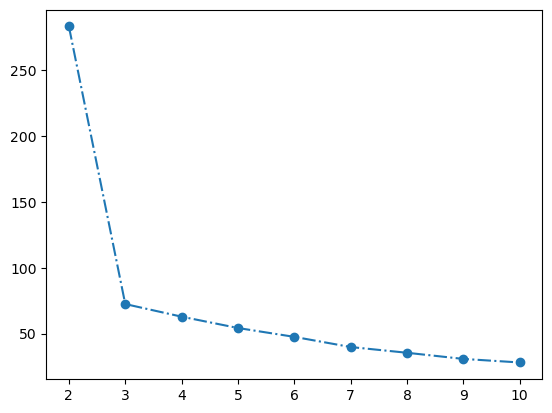

In [78]:
distortions = []
for k in range(2,11):
    km2 = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=0, tol=0.0001)
    km2.fit(X)
    distortions.append(km2.inertia_)
    
plt.plot(range(2,11), distortions, marker = 'o', linestyle = "-.")
    

### Find the optimal k from the graph

YOUR ANSWER HERE

## Quantifying the quality of clustering  via silhouette plots
Another intrinsic metric to evaluate the quality of a clustering is silhouette analysis.
Silhouette analysis can be used as a **graphical tool to plot a measure of how well the data points belong to the cluster** (how similar the data point is to its cluster compared to other clusters). 


To calculate the silhouette coefficient of a single sample in our dataset, we can apply the following three steps:
1. Calculate the **cluster cohesion** $a^{(i)}$ as the average distance between a sample $x^{(i)}$ and all other points in the same cluster.
2. Calculate the **cluster separation** $b^{(i)}$ from the next closest cluster as the average distance between the sample $x^{(i)}$ and all samples in the nearest cluster.
3. Calculate the silhouette $s^{(i)}$ as the difference between cluster cohesion and separation divided by the greater of the two.

$
s^{(i)} = \frac{b^{(i)} −a^{(i)}}{max( a^{(i)},b^{(i)})} 
$


- $-1= < s <= 1$. 
 
- Based on the preceding formula, we can see that the silhouette coefficient is 0 if the cluster separation
and cohesion are equal. 
- we get close to an ideal silhouette coefficient of 1 if $b^{(i)} >> a^{(i)}$ , since $b^{(i)}$ quantifies how dissimilar a sample is to other clusters, and $a^{(i)}$ tells us how similar it is to the other samples in its own cluster, respectively.

Watch this if you prefer a visual explanation:

https://www.youtube.com/watch?v=_j37uExzbXk



### Compute the silhouette score of each sample
- Import `silhouette_samples` from scikit-learn's metric module
- fit kmeans with k=3
- call `silhouette_samples(X, y, metric='euclidean')`


In [86]:
from sklearn.metrics import silhouette_samples

y_km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0, tol=0.0001).fit(X).predict(X)
silhouette_vals = silhouette_samples(X,y_km, metric='euclidean')

### Compute the mean Silhouette Coefficient of all samples.
Use `silhouette_score` from sklearn.metrics module.


In [87]:
from sklearn.metrics import silhouette_score
silhouette_score(X, y_km)

0.7143417887288687

### Create a plot of the silhouette coefficients for a k-means clustering with k = 3 
Use <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html">`barh`</a>
 

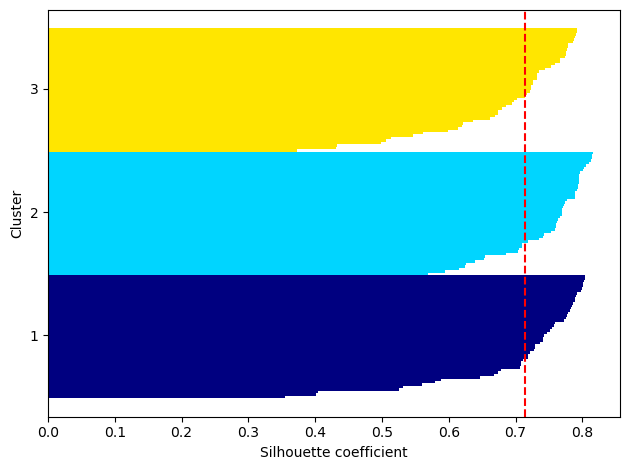

In [89]:
import matplotlib.cm as cm

#GET THE CLUSTERS FROM THE PREDICTED VECTOR y-km

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

y_ax_lower, y_ax_upper = 0, 0
yticks = []

#for each cluster, get the silhouette values and sort them
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    #sort them
    c_silhouette_vals.sort()
    
    y_ax_upper += len(c_silhouette_vals)
    
    #specify the color with respect to the number of clusters
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
            edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

#compute and plot the average silhouette
silhouette_avg = silhouette_score(X,y_km)


plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()


### Comparison to "bad" clustering: Use `k = 2`

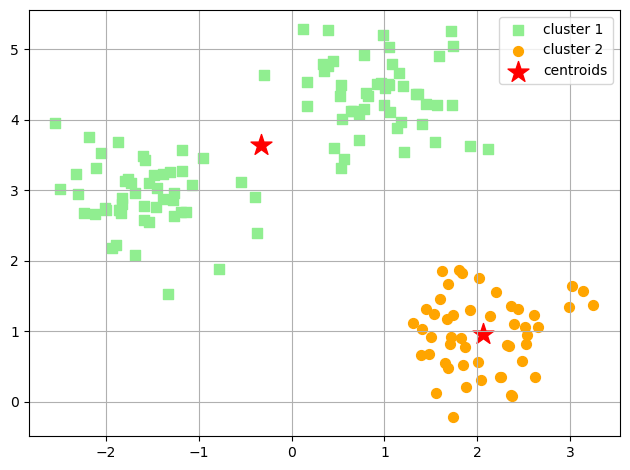

In [90]:
km = KMeans(n_clusters=2, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km==0,0], 
            X[y_km==0,1], 
            s=50, 
            c='lightgreen', 
            marker='s', 
            label='cluster 1')
plt.scatter(X[y_km==1,0], 
            X[y_km==1,1], 
            s=50, 
            c='orange', 
            marker='o', 
            label='cluster 2')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=250, marker='*', c='red', label='centroids')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

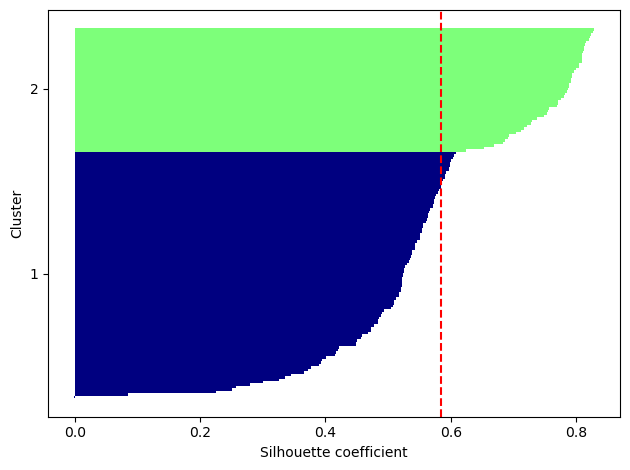

In [91]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
            edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

# Organizing clusters as a hierarchical tree

Hierarchical clustering

- **Divisive hierarchical clustering**: start with one cluster that encompasses all our samples, and iteratively split the cluster into smaller clusters until each cluster only contains one sample. 

- **Agglomerative clustering** takes the opposite approach: start with each sample as an individual cluster and merge the closest pairs of clusters until only one cluster remains.

![dendrogram](img/dendrogram.png)



If you prefer visual explanation:
https://youtu.be/ijUMKMC4f9I

**Algorithm of agglomerative clustering**
1. Compute the distance matrix of all samples.
2. Represent each data point as a singleton cluster.
3. Merge the two closest clusters.
4. Update the distance matrix using a linking algorithm.
5. Repeat steps 2 to 4 until one single cluster remains.

There are three standard linking algorithms to update the distance each time we find a new cluster: 
- <a href="https://www.youtube.com/watch?v=RdT7bhm1M3E">Single linkage</a>: update with the minimum of the two merged clusters
- <a href="https://www.youtube.com/watch?v=Cy3ci0Vqs3Y">Complete linkage</a>: update with the maximum
- <a href="https://www.youtube.com/watch?v=T1ObCUpjq3o">Average linkage</a>: update with the average



## Generate some random sample data to work with. 
The rows represent different observations (IDs 0 to 4), and the columns are the different features (X, Y, Z) of those samples:

In [92]:
import pandas as pd
import numpy as np

np.random.seed(123)

variables = ['X', 'Y', 'Z']
labels = ['ID_0','ID_1','ID_2','ID_3','ID_4']

X = np.random.random_sample([5,3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


## Compute a distance matrix
To calculate the distance matrix as input for the hierarchical clustering algorithm, use the `pdist` function from SciPy's `spatial.distance` submodule.

<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html">Here is the documentation</a>.

Put your distance matrix in a variable `pdist_`.

In [103]:
from scipy.spatial.distance import pdist
pdist_ = pd.DataFrame(pdist(df))

In [104]:
pdist_

,0
0,4.973534
1,5.516653
2,5.899885
3,3.835396
4,4.347073
5,5.104311
6,6.698233
7,7.244262
8,8.316594
9,4.382864


### You can create a square distance matrix using the following.
`pd.DataFrame(squareform(pdist(parameters),columns=labels, index=labels)`

## Apply the complete linkage agglomeration to the distance matrix
- Use the `linkage` function from SciPy's `cluster.hierarchy` submodule. 
- Use `pdist_` as input to `linkage`.
- Use `method = "complete"`
- Use  `metric='euclidean'` to specify the distance metric

Put the result in a variable `row_clusters`.

In [106]:
from scipy.cluster.hierarchy import linkage
row_clusters = linkage(pdist_, method="complete", metric = 'euclidean')

In [107]:
pd.DataFrame(row_clusters, 
             columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust.'],
             index=['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,4.0,9.0,0.035791,2.0
cluster 2,0.0,5.0,0.130777,2.0
cluster 3,1.0,2.0,0.383232,2.0
cluster 4,6.0,7.0,0.546029,2.0
cluster 5,3.0,10.0,0.547468,3.0
cluster 6,11.0,12.0,0.926351,4.0
cluster 7,8.0,13.0,1.618361,3.0
cluster 8,14.0,15.0,2.064489,7.0
cluster 9,16.0,17.0,4.481198,10.0


### Use the sample matrix as input to the `linkage` function.
You can either use the distance matrix or the sample matrix `df.values` as input to the linkage function.

In [109]:
row_clusters = linkage(df.values,metric = 'euclidean')

In [110]:
pd.DataFrame(row_clusters, 
             columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust.'],
             index=['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,4.382864,3.0
cluster 4,6.0,7.0,4.973534,5.0


## Visualize the dendrogram
- import dendrogram from the scipy.cluster.hierarchy submodule
- Use the dendrogram(row_clusters, labels=labels) function

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5]],
 'dcoord': [[0.0, 4.3470733871677325, 4.3470733871677325, 0.0],
  [0.0, 3.835395554137081, 3.835395554137081, 0.0],
  [0.0, 4.382864002932181, 4.382864002932181, 3.835395554137081],
  [4.3470733871677325,
   4.973534001694992,
   4.973534001694992,
   4.382864002932181]],
 'ivl': ['ID_1', 'ID_2', 'ID_3', 'ID_0', 'ID_4'],
 'leaves': [1, 2, 3, 0, 4],
 'color_list': ['C0', 'C0', 'C0', 'C0'],
 'leaves_color_list': ['C0', 'C0', 'C0', 'C0', 'C0']}

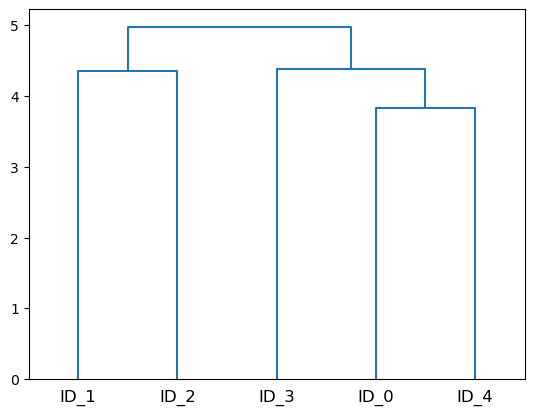

In [111]:
from scipy.cluster.hierarchy import dendrogram

dendrogram(row_clusters, labels=labels)

## Attaching dendrograms to a heat map
In practical applications, hierarchical clustering dendrograms are often used in combination with a heat map, which allows us to represent the individual values in the sample matrix with a color code. The following code attaches a dendrogram to a heat map plot and order the rows in the heat map correspondingly.

/var/folders/cr/dlw4zhlj7ld9t1grnb2q9hvw0000gn/T/ipykernel_14075/4201299645.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_xticklabels([''] + list(df_rowclust.columns))
/var/folders/cr/dlw4zhlj7ld9t1grnb2q9hvw0000gn/T/ipykernel_14075/4201299645.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_yticklabels([''] + list(df_rowclust.index))


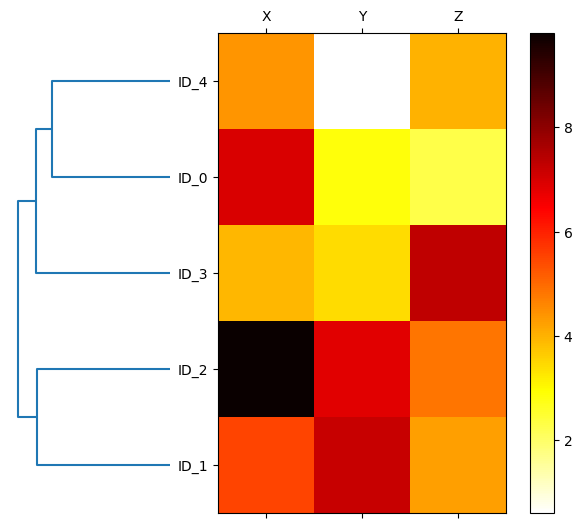

In [112]:
# plot row dendrogram
fig = plt.figure(figsize=(8,8))
axd = fig.add_axes([0.09,0.1,0.2,0.6])
row_dendr = dendrogram(row_clusters, orientation='left')

# reorder data with respect to clustering
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

axd.set_xticks([])
axd.set_yticks([])

# remove axes spines from dendrogram
for i in axd.spines.values():
        i.set_visible(False)


        
# plot heatmap
axm = fig.add_axes([0.23,0.1,0.6,0.6]) # x-pos, y-pos, width, height
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))

plt.show()

## Apply agglomerative clustering via scikit-learn

<a href='https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html'>Here is the documentation</a>.
- import `AgglomerativeClustering` from the `sklearn.cluster` submodul`
- Set the following parameters:
 - number of clusters n_clusters=2
 - distance affinity='euclidean'
 - linkage='complete'
- get the predicted labels with `fit_predict()`
- print the resulting labels


In [113]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
labels = ac.fit_predict(X)
print(labels)

[0 1 1 0 0]


/Users/fulin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


# Locating regions of high density via DBSCAN
DBSCAN: Density Based Spatial Clustering of Applications with Noise.
Here is a <a href=" https://youtu.be/5E097ZLE9Sg"> video that explains it.</a>

- The notion of density in DBSCAN is defined as the number of points within a specified radius $\epsilon$. 
In DBSCAN, a special label is assigned to each sample (point) using the following criteria:
- A point is considered as **core** point if at least a specified number (MinPts) of neighboring points fall within the specified radius $\epsilon$
- A border point is a point that has fewer neighbors than **MinPts** within $\epsilon$ , but lies within the $\epsilon$ radius of a core point
- All other points that are neither core nor border points are considered as **noise** points

After labeling the points as core, border, or noise points, the **DBSCAN algorithm** can be summarized in two simple steps:
1. Form a separate cluster for each core point or a connected group of core points (core points are connected if they are no farther away than $\epsilon$ ).
2. Assign each border point to the cluster of its corresponding core point.

**Main advantages** 
- Does not assume that the clusters have a spherical shape as in k-means. 
- Doesn't necessarily assign each point to a cluster but is capable of removing noise points.

![DBSCAN](img/DBSCAN.png)



Lets compare kmeans, heirarchical and DBSCAN clustering.

## Create sample data
Use `make_moons` from `sklearn.datasets`. Put the dataset in X, y variables.
Set up the following parameters:
- n_samples=200
- noise=0.05
- random_state=0

Make a scatter plot of the resulting dataset.

In [116]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

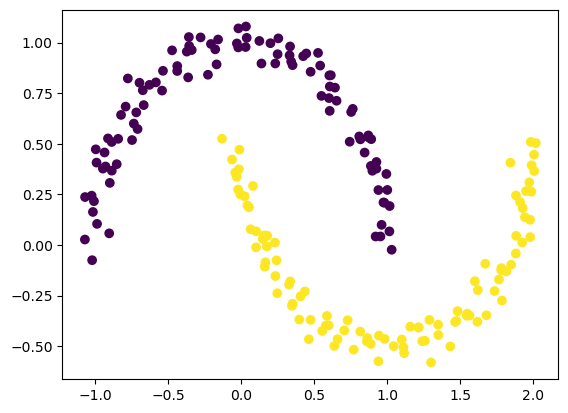

In [123]:
plt.scatter(X[:,0],X[:,1], c = y)

## Perform K-means and hierarchical clustering
Plot the resulting predictions in 2 separate scatter plots. 
You can check how color different clusters with different colors from the "Comparison to "bad" clustering" section above.

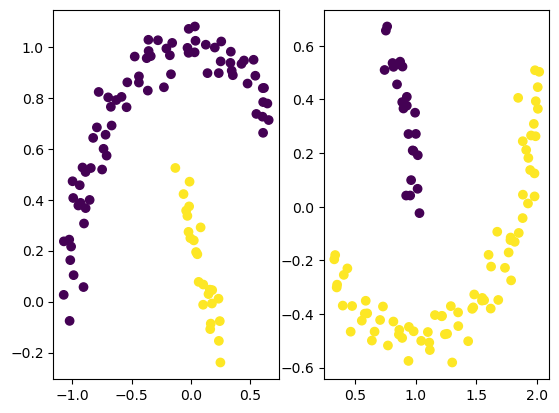

In [131]:
fig, ax = plt.subplots(nrows=1, ncols=2)
y_km = KMeans(n_clusters=2, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0).fit_predict(X)

ax[0].scatter(X[y_km == 0][:,0], X[y_km == 0][:,1], c =  y[y_km==0])

ax[1].scatter(X[y_km == 1][:,0], X[y_km == 1][:,1], c =  y[y_km==1])

## Density-based clustering:
Perform density-based clustering. 
Use the function `DBSCAN`. <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html">Here is the documentation.</a> 
    
    
- import DBSCAN from sklearn.cluster
- set up the parameters `eps=0.2`, `min_samples=5`, `metric='euclidean'`
- plot the predictions on a scatter plot.

In [136]:
from sklearn.cluster import DBSCAN

y_db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean').fit_predict(X)

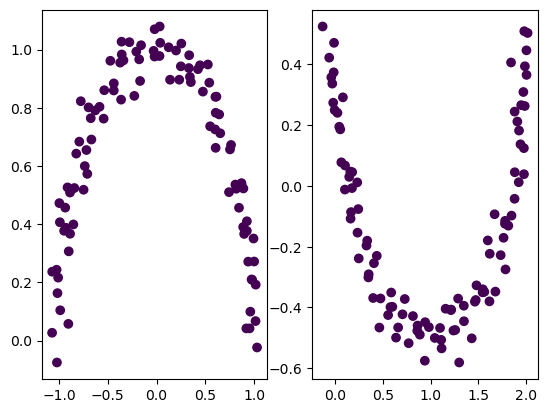

In [138]:
fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].scatter(X[y_db == 0][:,0], X[y_db == 0][:,1], c =  y[y_db==0])

ax[1].scatter(X[y_db == 1][:,0], X[y_db == 1][:,1], c =  y[y_db==1])